In [1]:
# install library requirements
!pip install pymaxflow

# import libraries
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

import maxflow as mf
import time
from random import shuffle
from PIL import Image

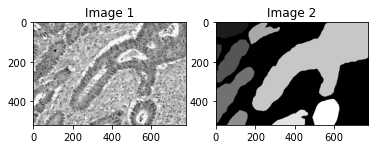

In [75]:
img1 = cv2.imread('17/train_5.bmp')
img2 = cv2.imread('17/train_5_anno.bmp')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

_, (plot1, plot2) = plt.subplots(1, 2)
plot1.title.set_text('Image 1')
plot2.title.set_text('Image 2')
plot1.imshow(img1, cmap='gray')
plot2.imshow(img2, cmap='gray')
plt.show()

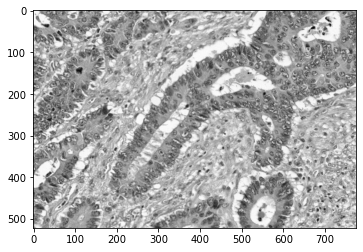

In [76]:
plt.imshow(img1, cmap = 'gray')

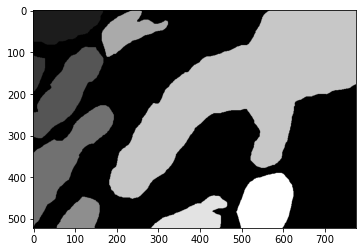

In [77]:
plt.imshow(img2, cmap = 'gray')

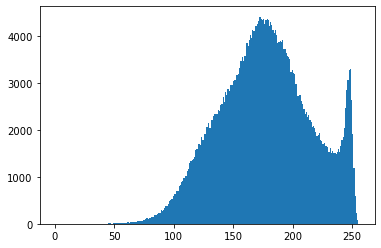

In [78]:
plt.hist(img1.ravel(),256,[0,256])
plt.show()

In [79]:
test = np.unique(img2)

In [80]:
threshold = 127
g1 = []
g2 = []
allowance = 1
flag = True
intensities = img1.flatten()

while flag:
    for i in intensities:
        if i <= threshold:
            g1.append(i)
        else:
            g2.append(i)

    temp = (np.mean(g1) + np.mean(g2))/2
    if abs(temp-threshold) <= allowance:
        flag = False
    else:
        threshold = temp
        flag = True

In [81]:
threshold

162.2128949853676

In [88]:
#set mask = bright if the gland consists of brighter region
mask='dark'

if mask == 'dark':
    binary = np.where(img1 < 170, 255,0)
else:
    binary = np.where(img1 > threshold, 255,0)

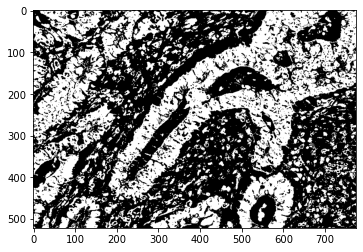

In [89]:
plt.imshow(binary, cmap='gray')

In [62]:
class evaluate:

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def jaccard(self):
        return sum(self.y_true*y_pred) / sum((self.y_true + y_pred > 0).astype(int))

    def dice(self):
        return 2 * sum(self.y_true*y_pred) / (sum(self.y_true) + sum(y_pred))

    def accuracy(self):
        return sum(self.y_true == y_pred) / len(self.y_true)

    def sensitivity(self):
        return sum(self.y_true*y_pred) / (sum(self.y_true))

    def specificity(self):
        return sum(abs(self.y_true - 1)*abs(y_pred - 1)) / sum(abs(self.y_true - 1))
  
    def summarize(self):
        print("Jaccard Coefficient Score : ", self.jaccard())
        print("Dice Coefficient Score : ", self.dice())
        print("Accuracy Score : ", self.accuracy())
        print("Sensitivity Score : ", self.sensitivity())
        print("Specificity Score : ", self.specificity())

In [63]:
y_true = (img2.ravel() > 0).astype(int)
y_pred = (np.array(binary).ravel() == 255).astype(int)

img_score = evaluate(y_true, y_pred)
print("\nGlobal Histogram Thresholding Performance")
img_score.summarize()


Global Histogram Thresholding Performance
Jaccard Coefficient Score :  0.4445071652616612
Dice Coefficient Score :  0.6154447356876104
Accuracy Score :  0.7421554813990854
Sensitivity Score :  0.6805322288714596
Specificity Score :  0.7689679881942276
